In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


# Thông tin sinh viên

Họ tên: Phan Anh Lộc

MSSV: 19521766

Bài thực hành số 4

# Import các thư viện

In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift,estimate_bandwidth


# Đường dẫn môn học

In [ ]:
dir_monhoc = '/gdrive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap','Baitap4')
dir_img = os.path.join(dir_baitap, 'images')

## YÊU CẦU 1

Histogram

In [ ]:
def drawHis(img):
  hist = cv.calcHist([img], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()

# Threshold Segmentation

In [ ]:
def Segmentation(f, T):
  g = f.copy()
  for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        g[i, j] = 255 if int(f[i, j]) > int(T) else 0
  return g

Đọc ảnh

In [ ]:
img1_path = os.path.join(dir_img, 'particles.bmp')
img1 = cv.imread(img1_path, 0)

img2_path = os.path.join(dir_img, 'Phandoan01.jpg')
img2 = cv.imread(img2_path, 0)

Xử lí ảnh

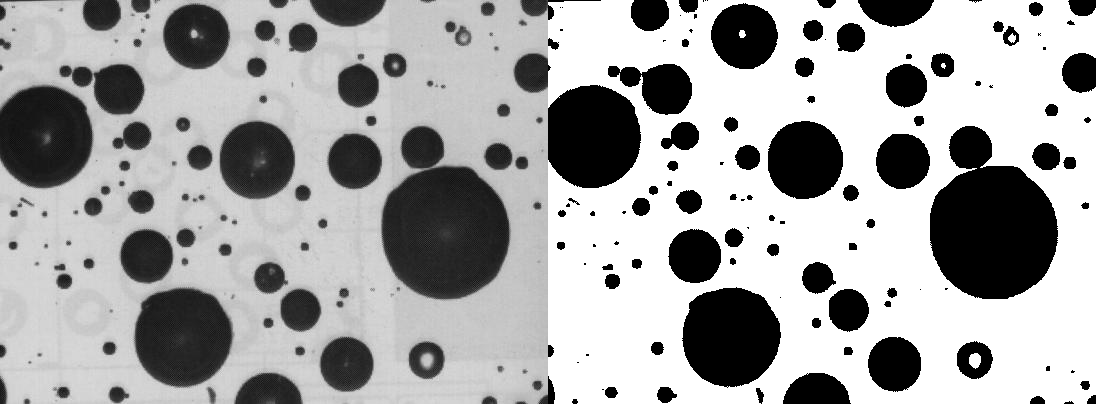

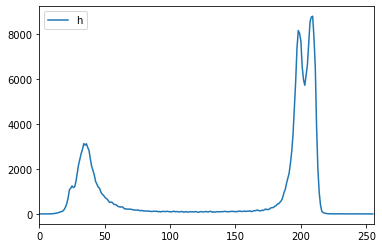

In [ ]:
img1_thesh = Segmentation(img1, 125)
img1_cmp = np.hstack((img1, img1_thesh))
cv2_imshow(img1_cmp)
drawHis(img1)

Đọc ảnh Phandoan1 và tính Histogram

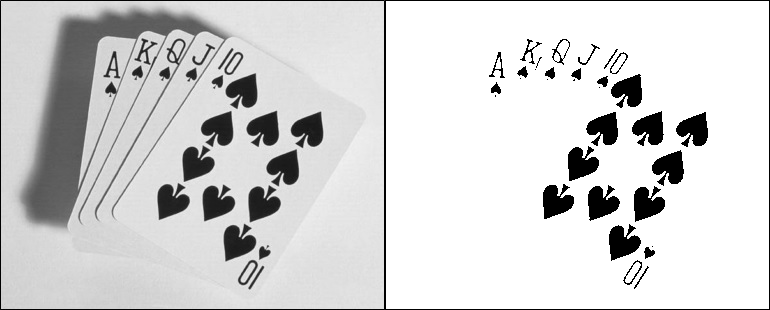

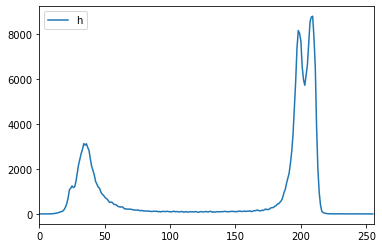

In [ ]:
img2_thresh = Segmentation(img2, 80)
img2_cmp = np.hstack((img2, img2_thresh))
cv2_imshow(img2_cmp)
drawHis(img1)

# Adaptive Seg

In [ ]:
def AdaptiveSeg(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      cv2_imshow(x)
      drawHis(x)
      t = int(input())
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = Segmentation(x, t)
  return g

Đọc ảnh

In [ ]:
img3_path = os.path.join(dir_img, 'wdg3.jpg')
img3 = cv.imread(img3_path, 0)

img4_path = os.path.join(dir_img, 'son1.jpg')
img4 = cv.imread(img4_path, 0)

Xử lí ảnh wdg3

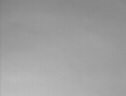

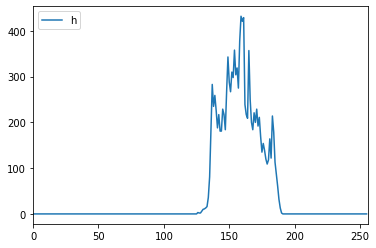

100


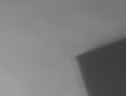

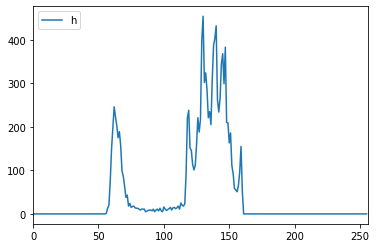

100


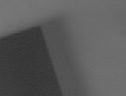

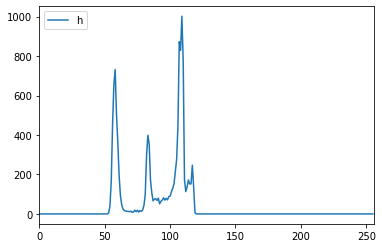

72


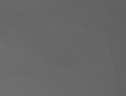

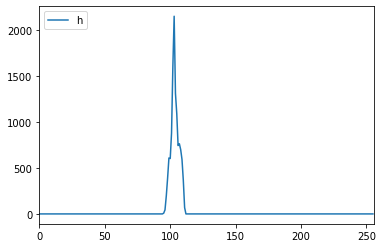

50


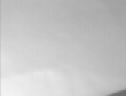

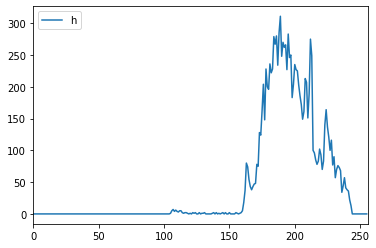

150


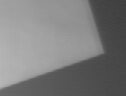

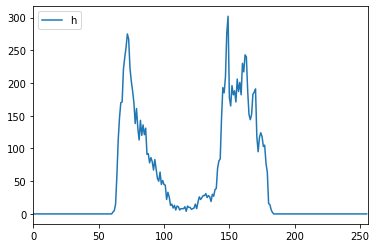

110


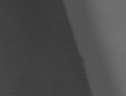

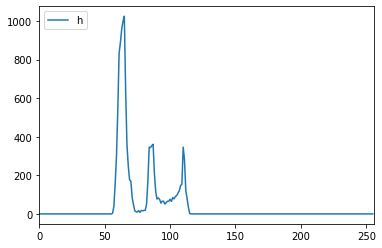

77


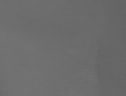

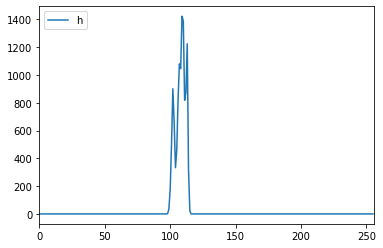

50


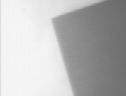

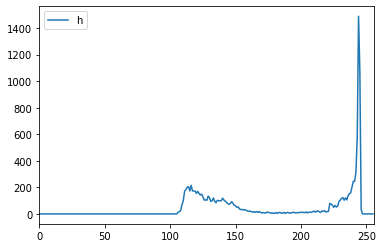

200


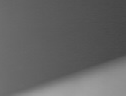

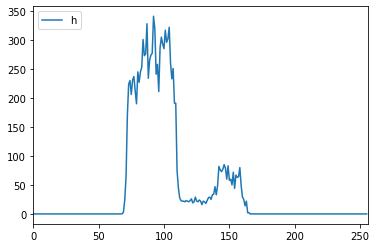

125


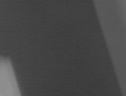

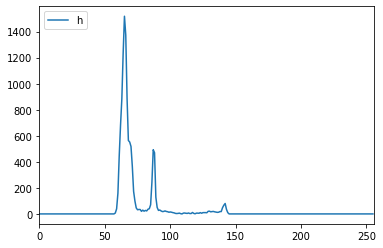

78


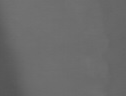

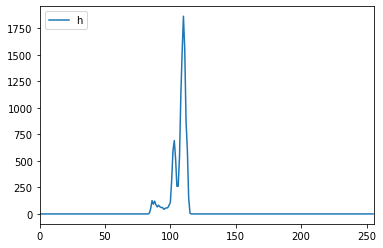

50


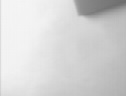

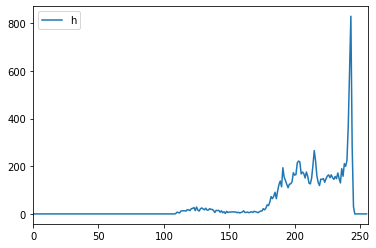

150


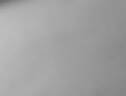

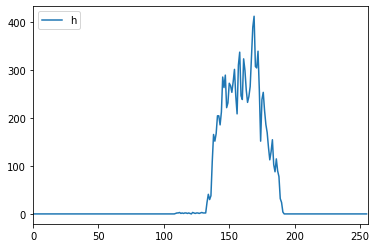

100


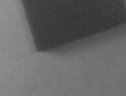

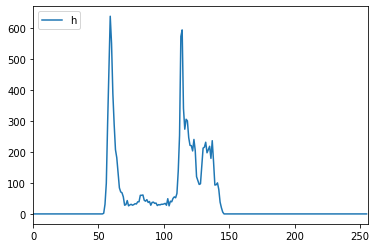

80


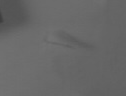

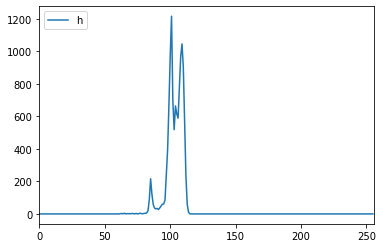

60


In [ ]:
img3_thresh = AdaptiveSeg(img3, 4, 4)

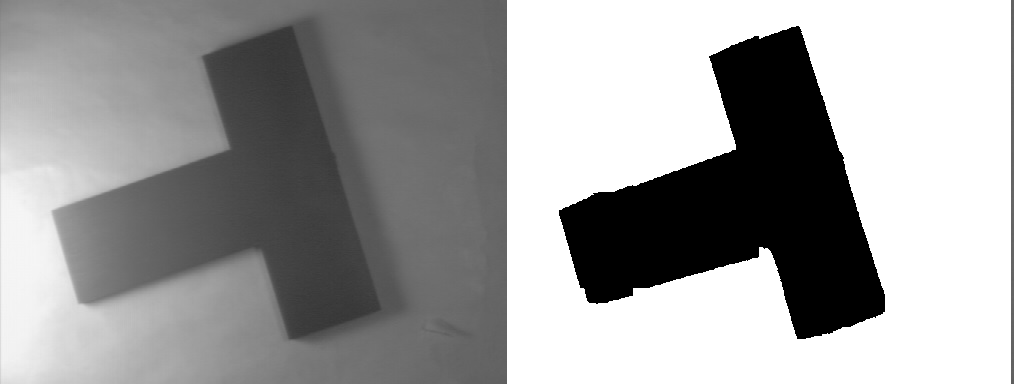

In [ ]:
img3_cmp = np.hstack((img3, img3_thresh))
cv2_imshow(img3_cmp)

Xử lí ảnh son1

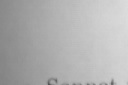

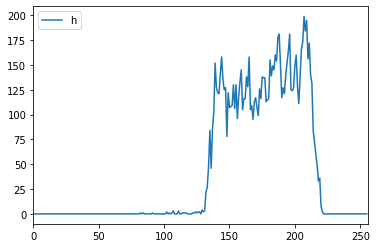

140


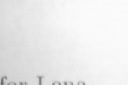

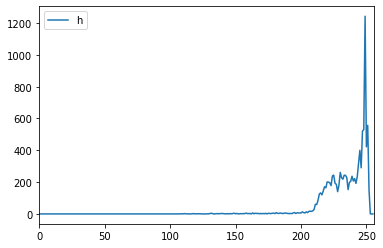

220


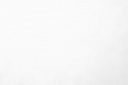

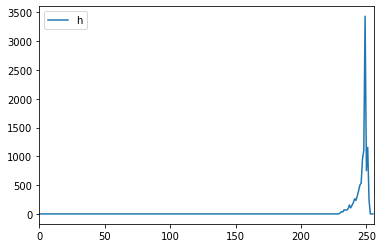

230


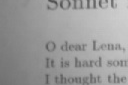

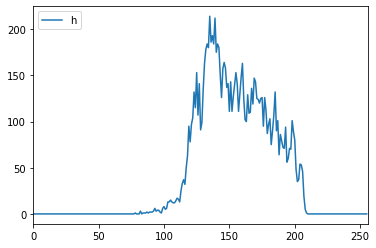

120


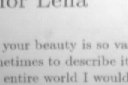

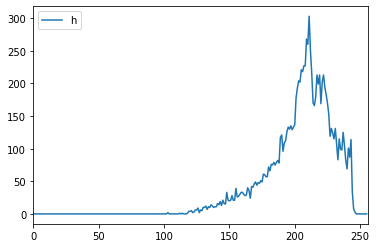

150


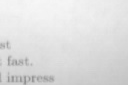

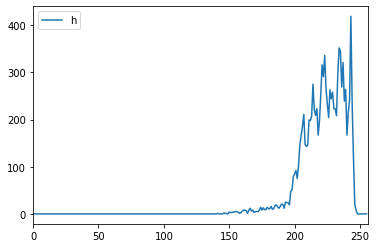

170


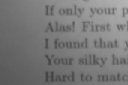

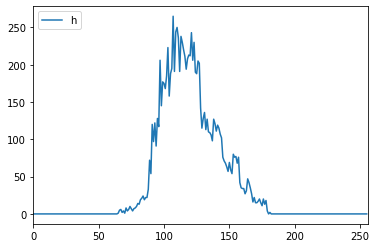

70


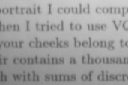

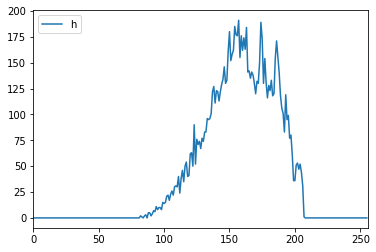

65


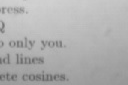

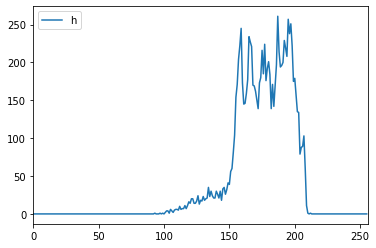

135


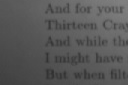

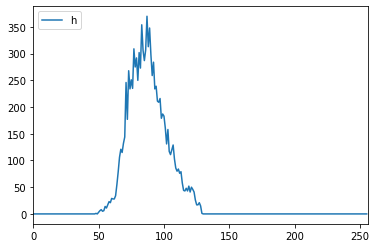

65


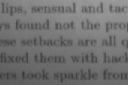

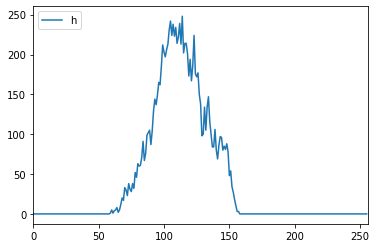

55


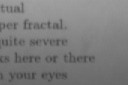

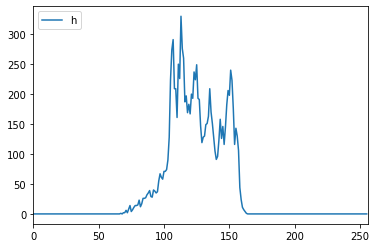

75


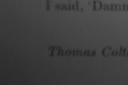

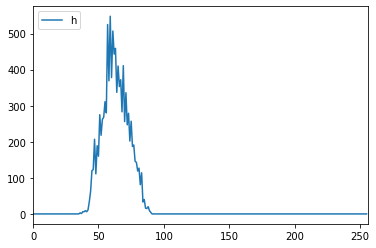

70


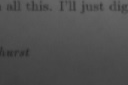

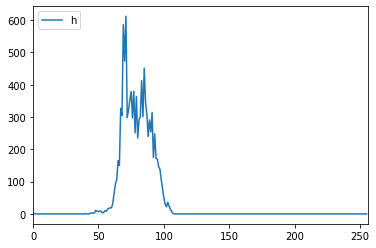

79


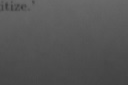

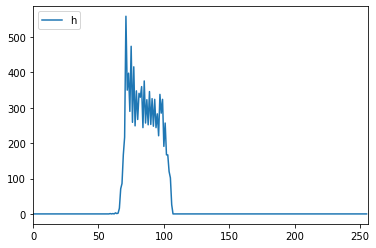

85


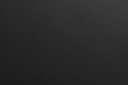

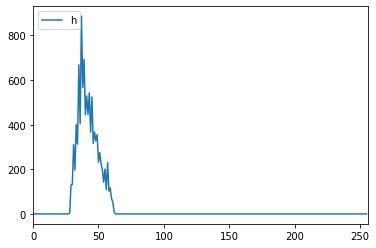

60


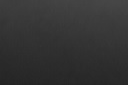

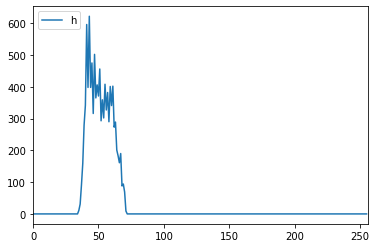

75


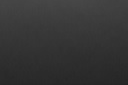

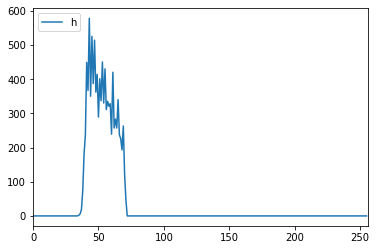

75


In [ ]:
img4_thresh = AdaptiveSeg(img4, 6, 3)

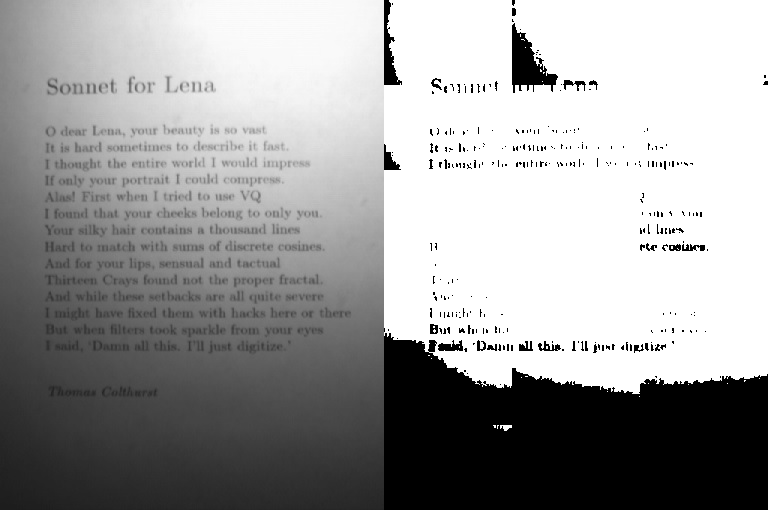

In [ ]:
img4_cmp = np.hstack((img4, img4_thresh))
cv2_imshow(img4_cmp)

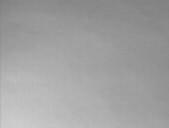

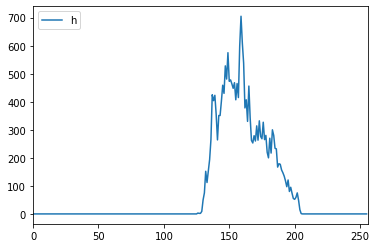

150


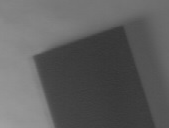

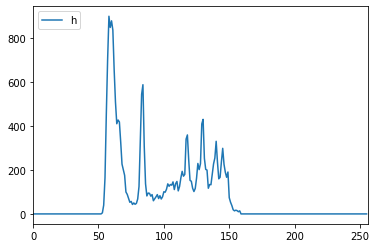

100


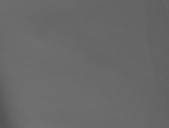

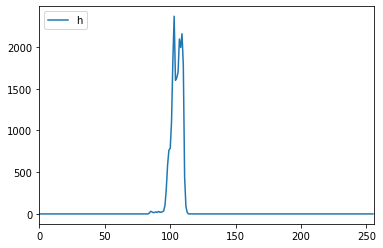

110


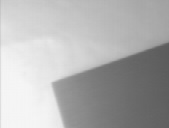

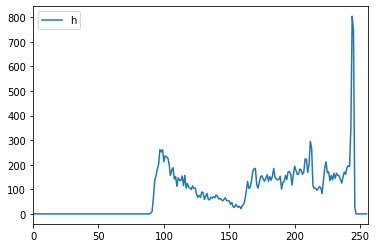

190


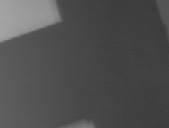

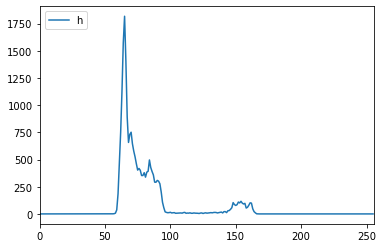

110


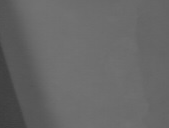

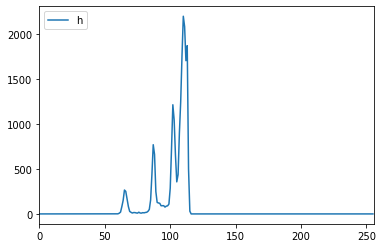

100


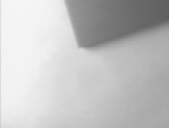

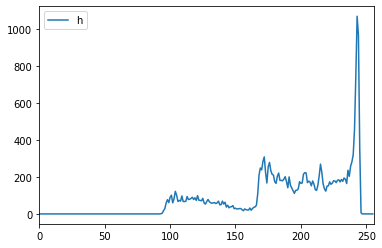

160


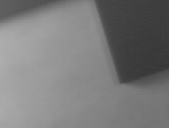

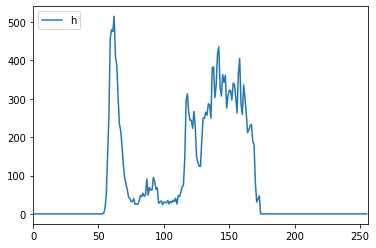

90


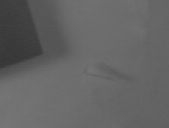

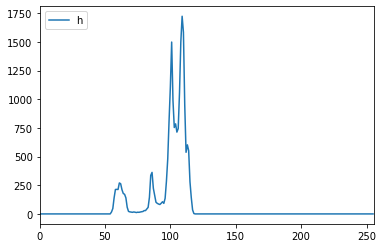

90


In [ ]:
img3_thresh = AdaptiveSeg(img3,3,3)

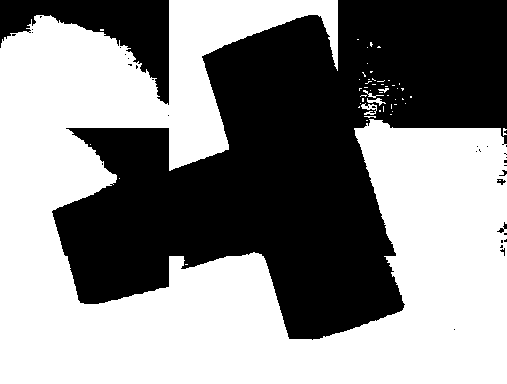

In [ ]:
cv2_imshow(img3_thresh)

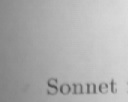

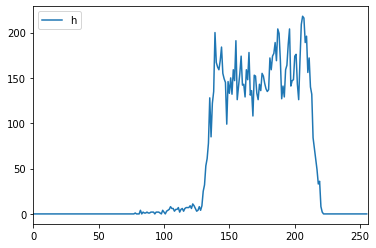

140


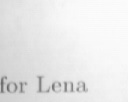

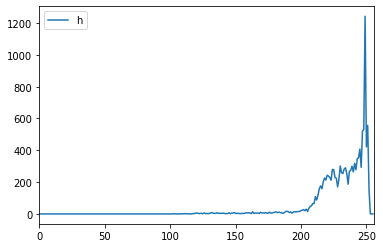

220


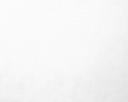

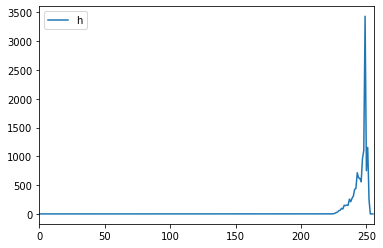

230


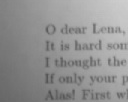

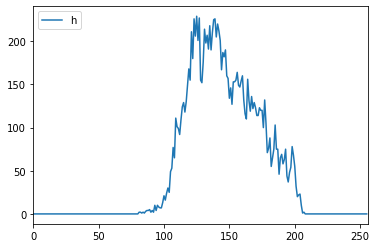

120


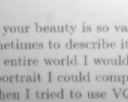

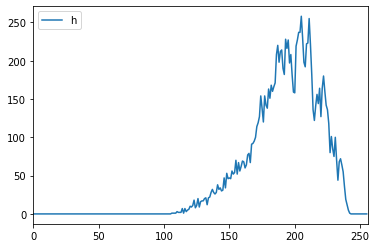

150


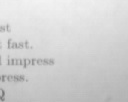

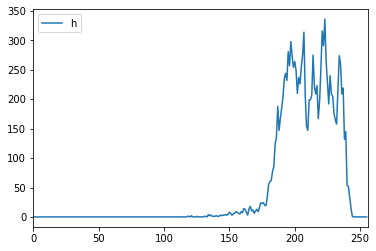

170


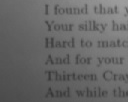

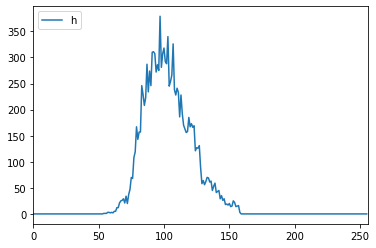

70


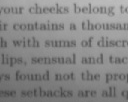

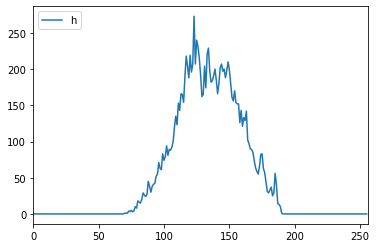

65


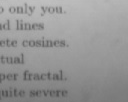

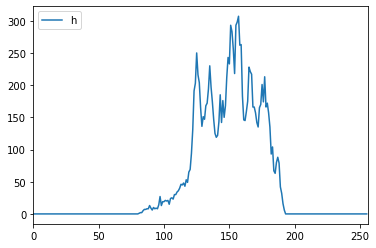

135


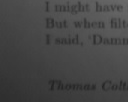

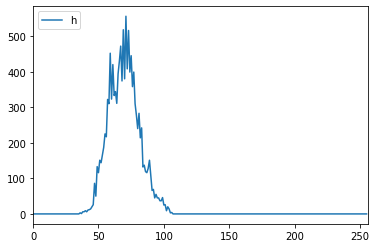

65


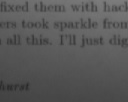

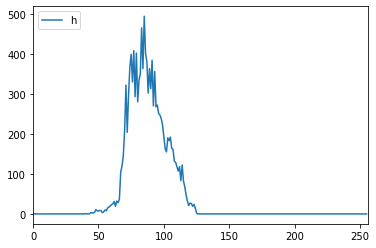

55


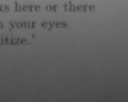

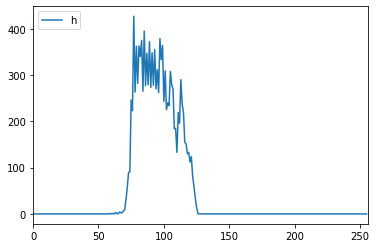

75


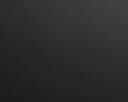

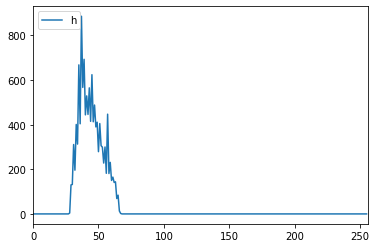

70


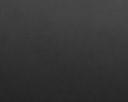

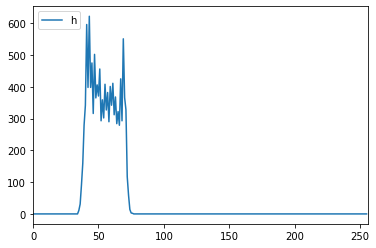

70


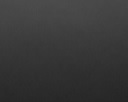

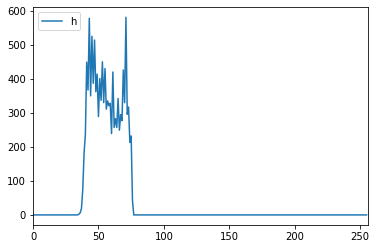

85


In [ ]:
img4_thresh = AdaptiveSeg(img4,5,3)

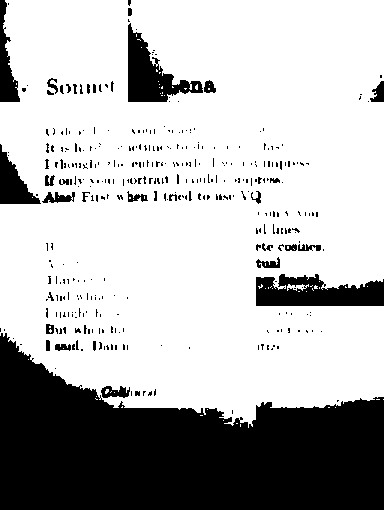

In [ ]:
cv2_imshow(img4_thresh)

## YÊU CẦU 2

# Kmeans (r,g,b)

In [ ]:
def kmeans(img_src, n_clusters):
    img = img_src.copy()
    nrow, ncol, nchl = img.shape
    g = img.reshape(nrow*ncol,nchl)
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    img_res = t.reshape(nrow, ncol, nchl)
    cv2_imshow(np.hstack((img, img_res)))

Đọc ảnh

In [ ]:
img5_path = os.path.join(dir_img, 'vegetables.jpg')
img5 = cv.imread(img5_path)

img6_path = os.path.join(dir_img, 'hand.jpg')
img6 = cv.imread(img6_path)

img7_path = os.path.join(dir_img, 'thuoc.jpg')
img7 = cv.imread(img7_path)

img8_path = os.path.join(dir_img, 'dogcat.jpg')
img8 = cv.imread(img8_path)

Xử lí ảnh

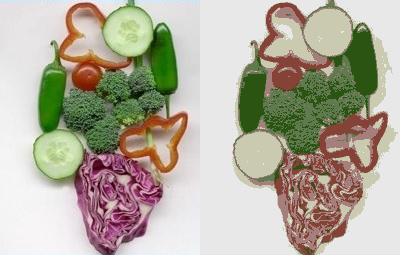

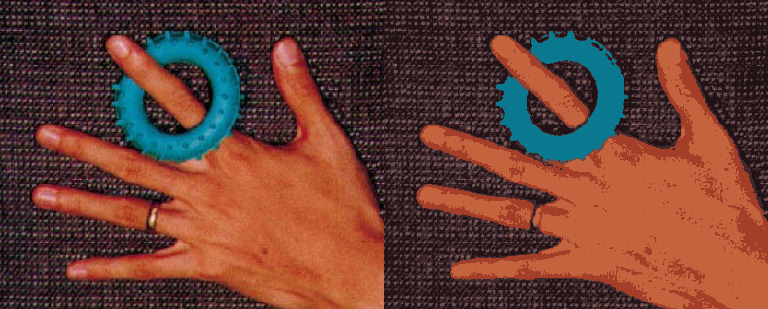

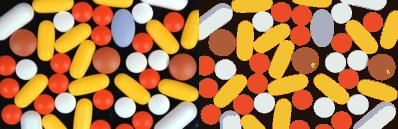

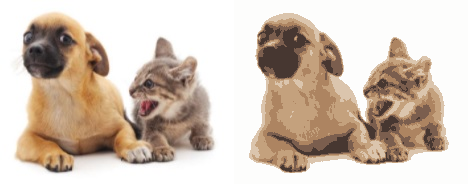

In [ ]:
img5_kmeans = kmeans(img5,6)
img6_kmeans = kmeans(img6,6)
img7_kmeans = kmeans(img7,6)
img8_kmeans = kmeans(img8,6)

# Kmeans (r,g,b,x,y)

In [ ]:
def Kmeans2(img_src, n_clusters):
    img = img_src.copy()
    # cv2_imshow(img)
    nrow, ncol, nchl = img.shape
    g = []
    for y in range(nrow):
        for x in range(ncol):
            temp = [img[y, x][0], img[y, x][1], img[y, x][2], x, y]
            g.append(temp)
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
    # t = k_means.cluster_centers_[k_means.labels_]
    colors = np.random.rand(20, 3) * 255
    t = colors[k_means.labels_]

    img_res = img
    i = 0
    for y in range(nrow):
        for x in range(ncol):
            img_res[y][x] = t[i][0:3]
            i = i+1
    tmp = np.hstack((img_src, img_res))
    # cv2_imshow(img_res)
    cv2_imshow(tmp)

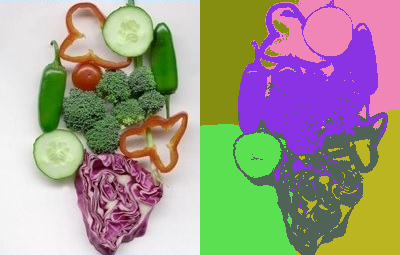

In [ ]:
Kmeans2(img5,6)

## YÊU CẦU 3


# Meanshift


In [ ]:
def Mean_Shift(img):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)

  bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)
  clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(g)

  t = clustering.cluster_centers_[clustering.labels_]
  img_res = t.reshape(nrow, ncol, nchl)
  cv2_imshow(np.hstack((img, img_res)))

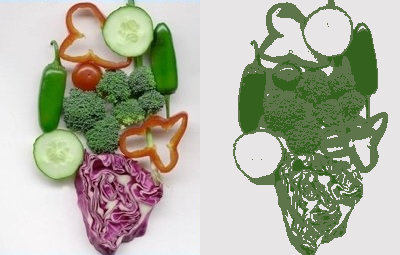

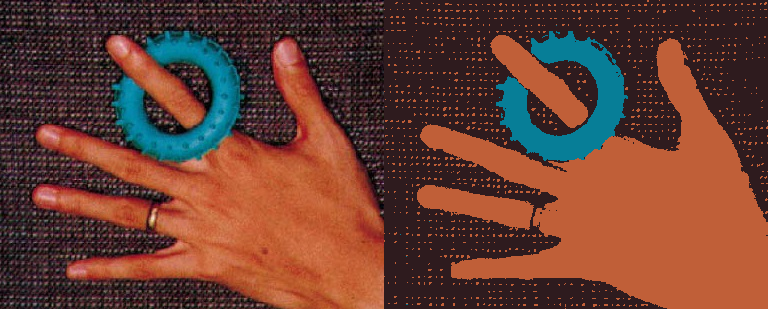

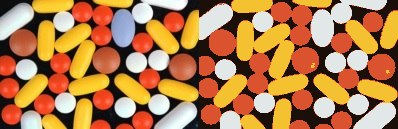

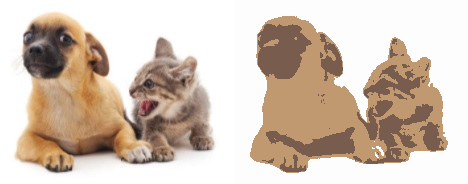

In [ ]:
img5_ms = Mean_Shift(img5)
img6_ms = Mean_Shift(img6)
img7_ms = Mean_Shift(img7)
img8_ms = Mean_Shift(img8)

## YÊU CẦU 4

# FCM

In [ ]:
!pip install fuzzy-c-means

     |████████████████████████████████| 15.7 MB 183 kB/s 
     |████████████████████████████████| 10.1 MB 29.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
def FCM_img(img):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)

  fcm = FCM(n_clusters = 6)
  fcm.fit(g)

  fcm_lables = fcm.predict(g)
  t = fcm.centers[fcm_lables]

  img_res = t.reshape(nrow, ncol, nchl)
  cv2_imshow(np.hstack((img, img_res)))

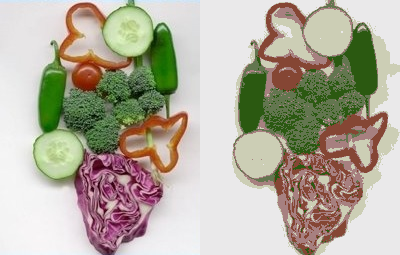

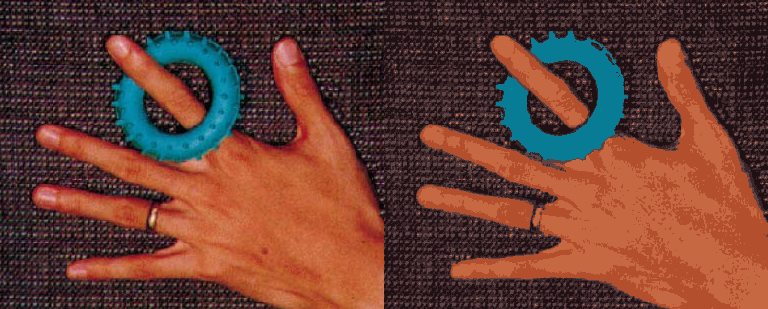

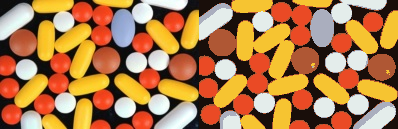

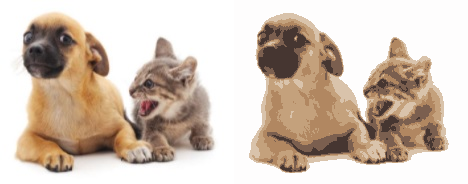

In [ ]:
img5_fcm = FCM_img(img5)
img6_fcm = FCM_img(img6)
img7_fcm = FCM_img(img7)
img8_fcm = FCM_img(img8)